In [2]:
from B3_Reader import *

FY06 = "/Users/pedrotodescan/projects data/Cotacoes_Hist/COTAHIST_A2006.TXT" 
FY07 = "/Users/pedrotodescan/projects data/Cotacoes_Hist/COTAHIST_A2007.TXT" 
FY08 = "/Users/pedrotodescan/projects data/Cotacoes_Hist/COTAHIST_A2008.TXT" 
FY09 = "/Users/pedrotodescan/projects data/Cotacoes_Hist/COTAHIST_A2009.TXT" 
FY10 = "/Users/pedrotodescan/projects data/Cotacoes_Hist/COTAHIST_A2010.TXT" 
FY11 = "/Users/pedrotodescan/projects data/Cotacoes_Hist/COTAHIST_A2011.TXT" 
FY12 = "/Users/pedrotodescan/projects data/Cotacoes_Hist/COTAHIST_A2012.TXT" 
FY13 = "/Users/pedrotodescan/projects data/Cotacoes_Hist/COTAHIST_A2013.TXT" 
FY14 = "/Users/pedrotodescan/projects data/Cotacoes_Hist/COTAHIST_A2014.TXT" 
FY15 = "/Users/pedrotodescan/projects data/Cotacoes_Hist/COTAHIST_A2015.TXT" 
FY16 = "/Users/pedrotodescan/projects data/Cotacoes_Hist/COTAHIST_A2016.TXT" 
FY17 = "/Users/pedrotodescan/projects data/Cotacoes_Hist/COTAHIST_A2017.TXT" 
FY18 = "/Users/pedrotodescan/projects data/Cotacoes_Hist/COTAHIST_A2018.TXT" 

 
dataFY06 = parse_dataset(FY06)
print('Parsing 2006')
dataFY07 = parse_dataset(FY07)
print('Parsing 2007')
dataFY08 = parse_dataset(FY08)
print('Parsing 2008')
dataFY09 = parse_dataset(FY09)
print('Parsing 2009')
dataFY10 = parse_dataset(FY10)
print('Parsing 2010')
dataFY11 = parse_dataset(FY11)
print('Parsing 2011')
dataFY12 = parse_dataset(FY12)
print('Parsing 2012')
dataFY13 = parse_dataset(FY13)
print('Parsing 2013')
dataFY14 = parse_dataset(FY14)
print('Parsing 2014')
dataFY15 = parse_dataset(FY15)
print('Parsing 2015')
dataFY16 = parse_dataset(FY16)
print('Parsing 2016')
dataFY17 = parse_dataset(FY17)
print('Parsing 2017')
dataFY18 = parse_dataset(FY18)

print('Merging Dataframes')
a = dataFY13.append(dataFY14).append(dataFY15).append(dataFY16).append(dataFY17.append(dataFY18))
b = dataFY06.append(dataFY07).append(dataFY08).append(dataFY09).append(dataFY10).append(dataFY11).append(dataFY12)
df=a.append(b)

print('Adjusting Formats and droping shitty data')

df= df[['Date', 'BDICode', 'Ticker', 'MarketType', 'FirmName', 'Especs','OpenPrice', 'HighPrice', 'LowPrice','AvgPrice', 'ClosePrice', 'BestBid', 'BestAsk', '#Trades','Volume', 'Adjust', 'LoteSize']]

df.drop(['Adjust'], axis=1)
df.drop(['LoteSize'], axis=1)

df = df.loc[df['MarketType'] == 'VISTA']
df.drop(['BDICode'], axis=1)

df = df.loc[df['BDICode'] == 'LOTE PADRAO']
df.drop(['MarketType','Especs','Adjust', 'LoteSize','BDICode'], axis=1, inplace=True)
df.set_index(['Date','Ticker'])
df.sort_index(inplace=True)
pd.options.mode.chained_assignment = None
print('Data is ready FAM')


Parsing 2006
Parsing 2007
Parsing 2008
Parsing 2009
Parsing 2010
Parsing 2011
Parsing 2012
Parsing 2013
Parsing 2014
Parsing 2015
Parsing 2016
Parsing 2017
Merging Dataframes
Adjusting Formats and droping shitty data
Data is ready FAM


In [3]:
newton = df.set_index(['Ticker','Date']).sort_index()
newton['Change']= newton.AvgPrice.pct_change()
newton['MA21']=newton.AvgPrice.rolling(21).mean()
newton['MA60']=newton.AvgPrice.rolling(60).mean()

In [4]:
petr=newton.loc['PETR4'][:]
itu=newton.loc['ITUB3'][:]
bradesco=newton.loc['BBDC4'][:]
vale=newton.loc['VALE3'][:]



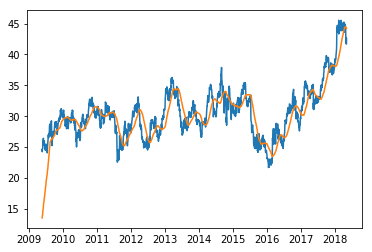

In [14]:
import matplotlib.pyplot as plt
plt.plot(itu.AvgPrice)
plt.plot(itu.MA60)
plt.show()


